<a href="https://colab.research.google.com/github/guimarczewski/colab/blob/master/156_Curitiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#156
Base de Dados contendo as solicitações geradas na Central 156, principal canal de comunicação entre o cidadão e a Prefeitura Municipal de Curitiba e disponibilizado no portal de dados abertos da mesma: https://www.curitiba.pr.gov.br/dadosabertos/busca/. Inclui todas as demandas direcionadas às Secretarias e Órgãos da Administração Municipal. Estes dados são oriundos do Sistema Integrado de Atendimento ao Cidadão - SIAC.


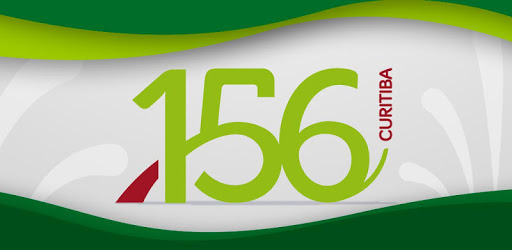

## Dicionário de dados:

O dicionário de dados do arquivo base foi retirado juntamente ao mesmo, sendo detalhado a seguir: 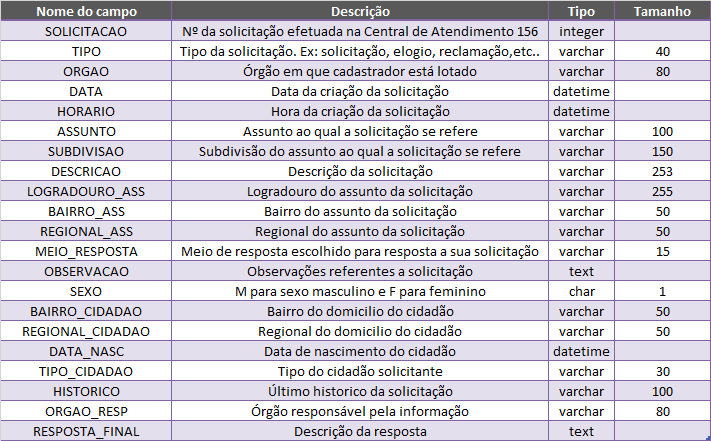

### Importando bibliotecas necessárias e realizando a conexão com o google

In [351]:
# instalando profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

# importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# importar biblioteca para decompor série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# importando biblioteca OS, para navegar pelos diretórios do Google Drive
import os

# conectando ao Google Drive, onde o arquivo foi carregado
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Localizar o dataset

Utilizaremos a biblioteca "os" para navegar entre os diretórios do google drive e localizarmos o arquivo que iremos trabalhar.

In [328]:
# verificando o diretório atual
os.getcwd()

'/content/gdrive/My Drive/156'

In [329]:
# indo para o diretório em que o arquivo se encontra
os.chdir('/content/gdrive/My Drive/156')

In [330]:
# verificando se o diretório foi alterado
os.getcwd()

'/content/gdrive/My Drive/156'

### Trabalhando os dados

In [331]:
# definindo o dataframe como df e exibindo as 5 primeiras linhas, com separador ";", mudando a codificação e devido a formatação dos dados puxando as 20 primeiroas colunas
df = pd.read_csv('/content/gdrive/My Drive/156/2020-09-01_156_-_Base_de_Dados.csv', sep=';',
                  usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], encoding='latin-1')
df.head()

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
0,---------------------,-------,------------,--------,---------------,---------------,-------------------,---------------------,-------------------------------,---------------------,-------------------------,---------------------------,-----------------------,---------,----------------------------,---------------------------------,-------------------,-----------------------,-----------------------,----------------------------
1,8510381,SOLICITAÇÃO,NaN,01/08/2020,18:05:52,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,23/04/1997,CIDADÃO,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática
2,8510381,SOLICITAÇÃO,NaN,01/08/2020,18:05:52,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,23/04/1997,CIDADÃO,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática
3,8510394,SOLICITAÇÃO,NaN,01/08/2020,18:14:16,COLETA,ENTULHOS DIVERSOS (PEQUENA QUANTIDADE),SOLICITA COLETA DE ENTULHOS DIVERSOS.,"Lamenha Lins, 62",CENTRO,Unidade Regional Matriz,EMAIL,NaN,M,BIGORRILHO,Unidade Regional Matriz,26/01/1979,CIDADÃO,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Conclusão - Automática
4,8510454,SOLICITAÇÃO,NaN,01/08/2020,19:11:03,PASSEIO,OBSTRUÇÃO DO PASSEIO,SOLICITA FISCALIZAÇÃO QUANTO A OBSTRUÇÃO DE CA...,"Cândido de Abreu, 526",CENTRO CIVICO,Unidade Regional Matriz,EMAIL,NaN,M,PILARZINHO,Unidade Regional Boa Vista,09/01/1993,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Conclusão - Automática


In [332]:
# excluindo a primeira coluna que não possui conteúdo
df = df.drop(0)

In [333]:
# confirmando a exclusão da primeira linha
df.head()

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
1,8510381,SOLICITAÇÃO,NaN,01/08/2020,18:05:52,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,23/04/1997,CIDADÃO,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática
2,8510381,SOLICITAÇÃO,NaN,01/08/2020,18:05:52,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,23/04/1997,CIDADÃO,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática
3,8510394,SOLICITAÇÃO,NaN,01/08/2020,18:14:16,COLETA,ENTULHOS DIVERSOS (PEQUENA QUANTIDADE),SOLICITA COLETA DE ENTULHOS DIVERSOS.,"Lamenha Lins, 62",CENTRO,Unidade Regional Matriz,EMAIL,NaN,M,BIGORRILHO,Unidade Regional Matriz,26/01/1979,CIDADÃO,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Conclusão - Automática
4,8510454,SOLICITAÇÃO,NaN,01/08/2020,19:11:03,PASSEIO,OBSTRUÇÃO DO PASSEIO,SOLICITA FISCALIZAÇÃO QUANTO A OBSTRUÇÃO DE CA...,"Cândido de Abreu, 526",CENTRO CIVICO,Unidade Regional Matriz,EMAIL,NaN,M,PILARZINHO,Unidade Regional Boa Vista,09/01/1993,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Conclusão - Automática
5,8510455,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/08/2020,19:11:41,TRÂNSITO,FISCALIZAÇÃO DE ESTACIONAMENTO IRREGULAR,SOLICITA FISCALIZAÇÃO DE TRÂNSITO.,"DA GLÓRIA, 258",ALTO DA GLORIA,Unidade Regional Matriz,EMAIL,TRATA SE DE DOIS VEICULOS,M,ALTO DA GLORIA,UNIDADE REGIONAL MATRIZ,22/06/1962,CIDADÃO,SECRETARIA MUNICIPAL DE TRÂNSITO,Conclusão - Automática


In [334]:
# identificar o volume de dados do DataFrame : linhas, colunas
df.shape

(26696, 20)

In [335]:
# ver valores ausentes de variáveis
df.isnull().sum()

SOLICITACAO            28
TIPO                   52
ORGAO                5750
DATA                   80
HORARIO                80
ASSUNTO                80
SUBDIVISAO             80
DESCRICAO              80
LOGRADOURO_ASS         80
BAIRRO_ASS             85
REGIONAL_ASS           85
MEIO_RESPOSTA          80
OBSERVACAO          17908
SEXO                   80
BAIRRO_CIDADAO        642
REGIONAL_CIDADAO     1231
DATA_NASC              80
TIPO_CIDADAO           80
ORGAO_RESP             80
RESPOSTA_FINAL         80
dtype: int64

In [336]:
# verificando "DATA" null
dfdatanull = df[(df["DATA"].isnull() == True)]
dfdatanull.head(10)

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
759,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3426,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3751,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3823,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3883,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3885,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
# verificando "SOLICITACAO" null
dfsolnull = df[(df["SOLICITACAO"].isnull() == True)]
dfsolnull.head()

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
759,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189,NaN,Solicitação atendida.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
# transformando a coluna "SOLICITACAO" em index
df = df.set_index("SOLICITACAO")
df.head()

,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
SOLICITACAO,,,,,,,,,,,,,,,,,,,
8510381,SOLICITAÇÃO,NaN,01/08/2020,18:05:52,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,23/04/1997,CIDADÃO,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática
8510381,SOLICITAÇÃO,NaN,01/08/2020,18:05:52,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,23/04/1997,CIDADÃO,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática
8510394,SOLICITAÇÃO,NaN,01/08/2020,18:14:16,COLETA,ENTULHOS DIVERSOS (PEQUENA QUANTIDADE),SOLICITA COLETA DE ENTULHOS DIVERSOS.,"Lamenha Lins, 62",CENTRO,Unidade Regional Matriz,EMAIL,NaN,M,BIGORRILHO,Unidade Regional Matriz,26/01/1979,CIDADÃO,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Conclusão - Automática
8510454,SOLICITAÇÃO,NaN,01/08/2020,19:11:03,PASSEIO,OBSTRUÇÃO DO PASSEIO,SOLICITA FISCALIZAÇÃO QUANTO A OBSTRUÇÃO DE CA...,"Cândido de Abreu, 526",CENTRO CIVICO,Unidade Regional Matriz,EMAIL,NaN,M,PILARZINHO,Unidade Regional Boa Vista,09/01/1993,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Conclusão - Automática
8510455,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/08/2020,19:11:41,TRÂNSITO,FISCALIZAÇÃO DE ESTACIONAMENTO IRREGULAR,SOLICITA FISCALIZAÇÃO DE TRÂNSITO.,"DA GLÓRIA, 258",ALTO DA GLORIA,Unidade Regional Matriz,EMAIL,TRATA SE DE DOIS VEICULOS,M,ALTO DA GLORIA,UNIDADE REGIONAL MATRIZ,22/06/1962,CIDADÃO,SECRETARIA MUNICIPAL DE TRÂNSITO,Conclusão - Automática


Ao analisarmos acima determinadas colunas com valores nulos, percebe-se que não trabalharemos com solicitações em que a coluna "DATA" não possui valores, pois não são solicitações reais.

In [339]:
df = df[(df["DATA"].isnull() == False)]
df.isnull().sum()

TIPO                    0
ORGAO                5670
DATA                    0
HORARIO                 0
ASSUNTO                 0
SUBDIVISAO              0
DESCRICAO               0
LOGRADOURO_ASS          0
BAIRRO_ASS              5
REGIONAL_ASS            5
MEIO_RESPOSTA           0
OBSERVACAO          17828
SEXO                    0
BAIRRO_CIDADAO        562
REGIONAL_CIDADAO     1151
DATA_NASC               0
TIPO_CIDADAO            0
ORGAO_RESP              0
RESPOSTA_FINAL          0
dtype: int64

In [340]:
# verificando tipo de dados das colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26616 entries, 8510381 to 8550886
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIPO              26616 non-null  object
 1   ORGAO             20946 non-null  object
 2   DATA              26616 non-null  object
 3   HORARIO           26616 non-null  object
 4   ASSUNTO           26616 non-null  object
 5   SUBDIVISAO        26616 non-null  object
 6   DESCRICAO         26616 non-null  object
 7   LOGRADOURO_ASS    26616 non-null  object
 8   BAIRRO_ASS        26611 non-null  object
 9   REGIONAL_ASS      26611 non-null  object
 10  MEIO_RESPOSTA     26616 non-null  object
 11  OBSERVACAO        8788 non-null   object
 12  SEXO              26616 non-null  object
 13  BAIRRO_CIDADAO    26054 non-null  object
 14  REGIONAL_CIDADAO  25465 non-null  object
 15  DATA_NASC         26616 non-null  object
 16  TIPO_CIDADAO      26616 non-null  object
 17  ORGAO_RES

In [341]:
# convertendo coluna para o formato correto após remover espaço presente no dataset
str(df.DATA)
df["Data"] = pd.to_datetime(df.DATA.str.replace('                    ', '').str.replace('/','-'), format="%d-%m-%Y")
df["Hora"] = pd.to_datetime(df.HORARIO.str.replace('  ', '').str.replace(':','-'), format="%H-%M-%S")

# excluindo colunas que não serão utilizadas
df.drop("DATA", axis=1, inplace=True)
df.drop("HORARIO", axis=1, inplace=True)
df.drop("DATA_NASC", axis=1, inplace=True)
df.drop("TIPO_CIDADAO", axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26616 entries, 8510381 to 8550886
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TIPO              26616 non-null  object        
 1   ORGAO             20946 non-null  object        
 2   ASSUNTO           26616 non-null  object        
 3   SUBDIVISAO        26616 non-null  object        
 4   DESCRICAO         26616 non-null  object        
 5   LOGRADOURO_ASS    26616 non-null  object        
 6   BAIRRO_ASS        26611 non-null  object        
 7   REGIONAL_ASS      26611 non-null  object        
 8   MEIO_RESPOSTA     26616 non-null  object        
 9   OBSERVACAO        8788 non-null   object        
 10  SEXO              26616 non-null  object        
 11  BAIRRO_CIDADAO    26054 non-null  object        
 12  REGIONAL_CIDADAO  25465 non-null  object        
 13  ORGAO_RESP        26616 non-null  object        
 14  RESPOSTA_FINAL    2

In [350]:
# exibindo dados após limpeza
df.head()

,TIPO,ORGAO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,Data,Hora
SOLICITACAO,,,,,,,,,,,,,,,,,
8510381,SOLICITAÇÃO,NaN,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática,2020-08-01,1900-01-01 18:05:52
8510381,SOLICITAÇÃO,NaN,CORONAVÍRUS (COVID-19),AGLOMERAÇÕES EM LOCAIS PÚBLICOS,SOLICITA FISCALIZAÇÃO PARA AGLOMERAÇÃO EM LOCA...,"Conselheiro Dantas, 286",PRADO VELHO,Unidade Regional Matriz,EMAIL,NaN,M,PRADO VELHO,Unidade Regional Matriz,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,Conclusão - Automática,2020-08-01,1900-01-01 18:05:52
8510394,SOLICITAÇÃO,NaN,COLETA,ENTULHOS DIVERSOS (PEQUENA QUANTIDADE),SOLICITA COLETA DE ENTULHOS DIVERSOS.,"Lamenha Lins, 62",CENTRO,Unidade Regional Matriz,EMAIL,NaN,M,BIGORRILHO,Unidade Regional Matriz,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Conclusão - Automática,2020-08-01,1900-01-01 18:14:16
8510454,SOLICITAÇÃO,NaN,PASSEIO,OBSTRUÇÃO DO PASSEIO,SOLICITA FISCALIZAÇÃO QUANTO A OBSTRUÇÃO DE CA...,"Cândido de Abreu, 526",CENTRO CIVICO,Unidade Regional Matriz,EMAIL,NaN,M,PILARZINHO,Unidade Regional Boa Vista,SECRETARIA MUNICIPAL DO URBANISMO,Conclusão - Automática,2020-08-01,1900-01-01 19:11:03
8510455,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,TRÂNSITO,FISCALIZAÇÃO DE ESTACIONAMENTO IRREGULAR,SOLICITA FISCALIZAÇÃO DE TRÂNSITO.,"DA GLÓRIA, 258",ALTO DA GLORIA,Unidade Regional Matriz,EMAIL,TRATA SE DE DOIS VEICULOS,M,ALTO DA GLORIA,UNIDADE REGIONAL MATRIZ,SECRETARIA MUNICIPAL DE TRÂNSITO,Conclusão - Automática,2020-08-01,1900-01-01 19:11:41


Após retirarmos os valores nulos da coluna DATA, sobraram apenas valores nulos em colunas que não influenciarão na análise, pois, por exemplo, as informações do Orgão não são realmente necessárias na hora de realizar o acionamento, assim como observações.

### Analisando os dados com a biblioteca Pandas Profiling

In [342]:
# criar ProfileReport
report = ProfileReport(df)

In [343]:
# criar visualização iframe
report.to_notebook_iframe()

### Analisando número de solicitações por períodos

In [344]:
# criando um novo dataframe
dftempo = df[['Data', 'Hora']]

In [ ]:
# criar features para cada período
dftempo['Ano'] = dftempo.Data.dt.year
dftempo['Mês'] = dftempo.Data.dt.month
dftempo['Dia'] = dftempo.Data.dt.day
dftempo['H'] = dftempo.Hora.dt.hour
dftempo['Dia_da_Semana'] = dftempo.Data.dt.dayofweek

In [346]:
dftempo.head()

,Data,Hora,Ano,Mês,Dia,H,Dia_da_Semana
SOLICITACAO,,,,,,,
8510381,2020-08-01,1900-01-01 18:05:52,2020,8,1,18,5
8510381,2020-08-01,1900-01-01 18:05:52,2020,8,1,18,5
8510394,2020-08-01,1900-01-01 18:14:16,2020,8,1,18,5
8510454,2020-08-01,1900-01-01 19:11:03,2020,8,1,19,5
8510455,2020-08-01,1900-01-01 19:11:41,2020,8,1,19,5


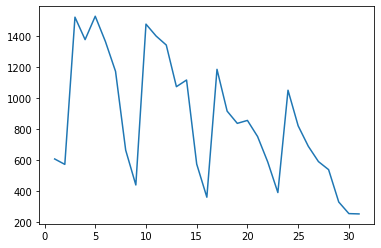

In [347]:
# verificando a quantidade de solicitações por dia
plt.plot(dftempo.groupby(['Dia']).Data.count());

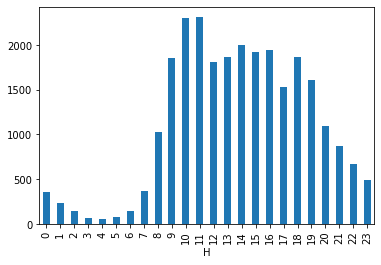

In [348]:
# quantidade de solicitações em função do horário
dftempo['H'].groupby(dftempo['H']).count().plot.bar();

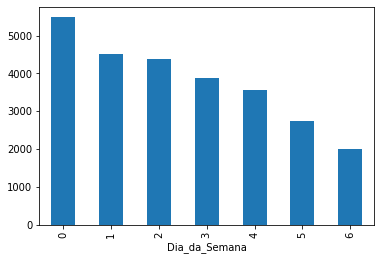

In [349]:
# quantidade de solicitações por dia da semana, iniciando no domingo = 0
dftempo['Dia_da_Semana'].groupby(dftempo['Dia_da_Semana']).count().plot.bar();

### Analisando os dados encontrados


*   A maior quantidade de solicitações ocorre das 8h às 21h;
*   os três dias da semana com mais solicitações são domingo, segunda e terça, com o número de solicitações diminuindo no decorrer da semana;
*   existe uma tendência de queda nas solicitações no decorrer do mês;
*   os três bairros com mais solicitações são:
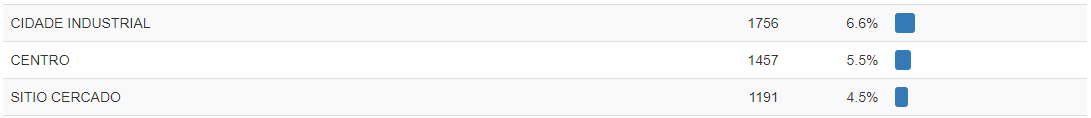
*  Três regionais detém quase 50% dos contatos:
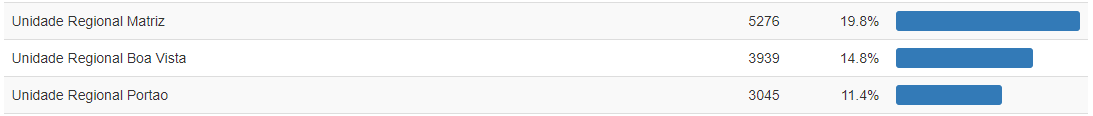
*   As secretarias responsáveis pela maior parte das solicitações são:
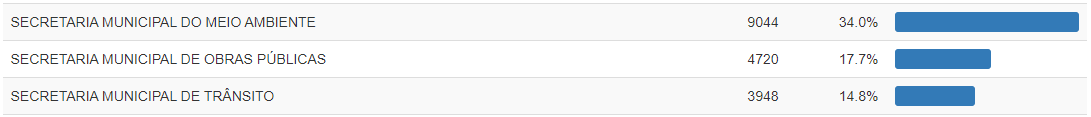
*   As categorias com mais solicitações são:
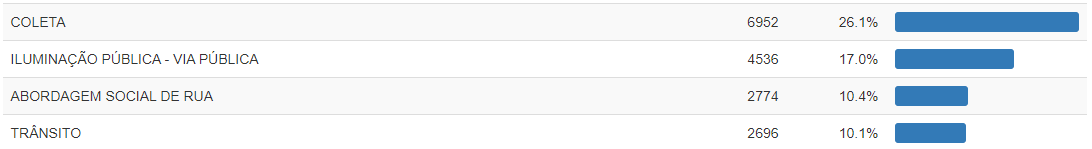
*   Em 90% dos casos os contatos via 156 são solicitações:
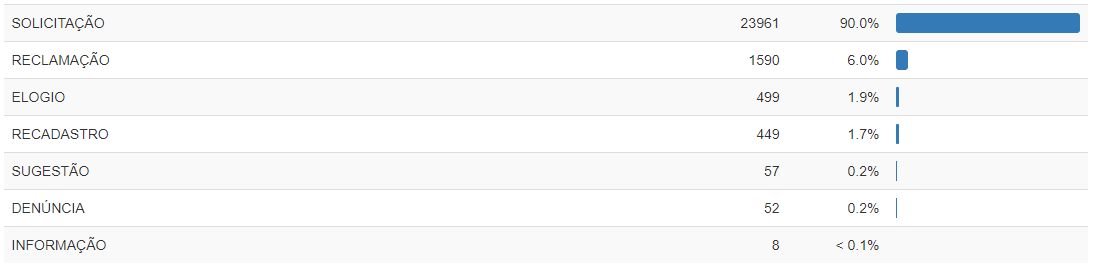


